In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"datasets/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
## we will not need customer ID, gender , age for clustering 

X = df.iloc[:, [3,4]].values # this will return a numpy array not a dataframe 

In [9]:
X.shape 

(200, 2)

In [10]:
## Choosing correct numbers of clusters using wcss : within clusters sum of squares 


# finding wcss values for different numbr of clusters 

wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

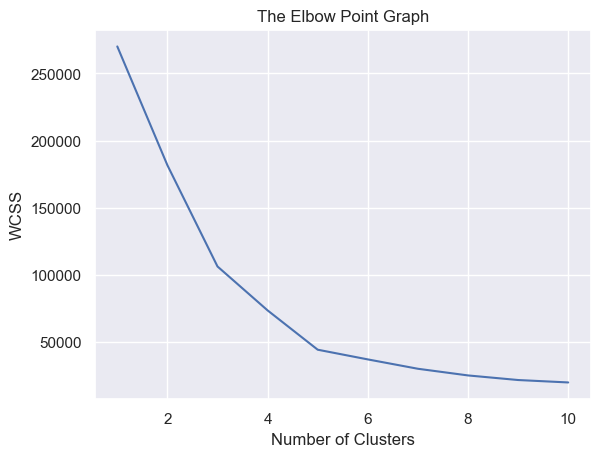

In [13]:
 # plot an elbow graph 
    
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
## Training the K-Means Clustering Model 

kmeans = KMeans(n_clusters = 5, init= 'k-means++', random_state = 76)

Y = kmeans.fit_predict(X)
print(Y)

C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


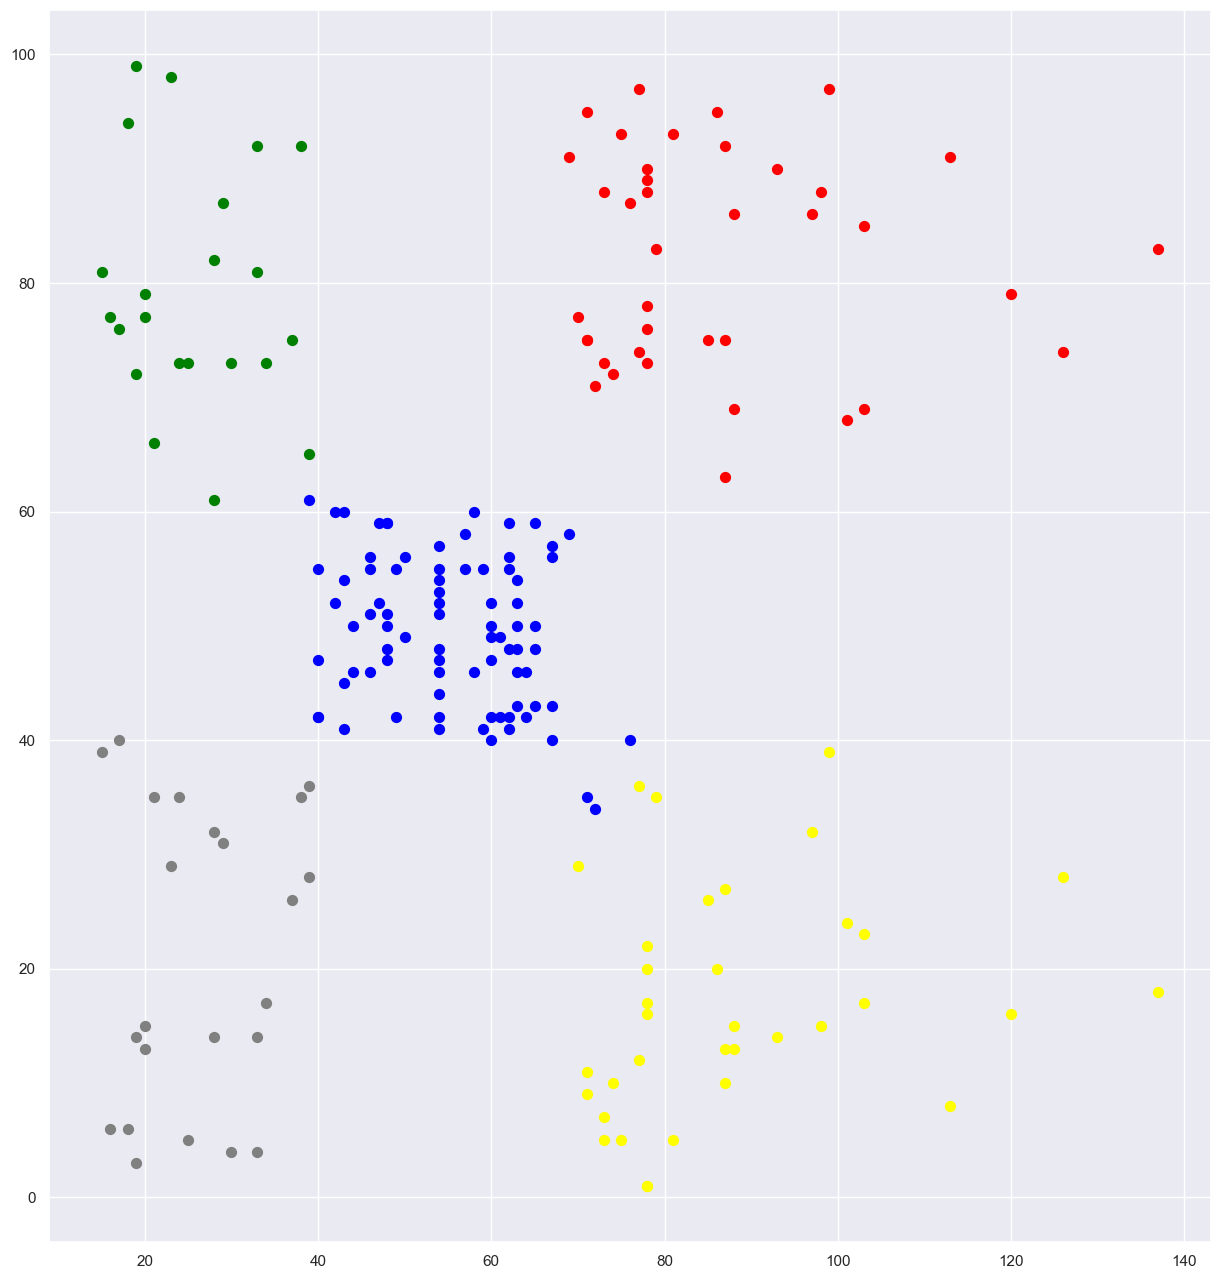

In [18]:
## Visualizing all the clusters 

plt.figure(figsize=(15, 16))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s = 50,  c = 'green' , label = 'Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s = 50,  c = 'blue' , label = 'Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s = 50,  c = 'yellow' , label = 'Cluster 3')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s = 50,  c = 'red' , label = 'Cluster 4')
plt.scatter(X[Y==4, 0], X[Y==4, 1], s = 50,  c = 'grey' , label = 'Cluster 5')

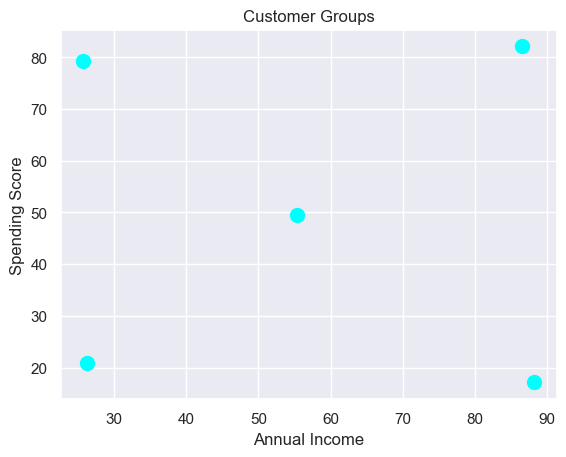

In [24]:
## plot the centroids 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()